## SVM

ref : https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/


### SVM for Iris dataset


In [4]:
from sklearn.datasets import load_iris 
iris = load_iris() 
print "type : ",type(iris) 
print(iris.feature_names) 
#print(iris.data) 



type :  <class 'sklearn.utils.Bunch'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
X=iris.data 
y=iris.target 


from sklearn import svm
model =svm.SVC()

model.fit(X,y) 
print(model.predict([[3,5,4,2]])) 


[2]


### SVM regulation parameter  (non-linear) ,Kernal (seperate in higher dimen),Gamma (how far influence)

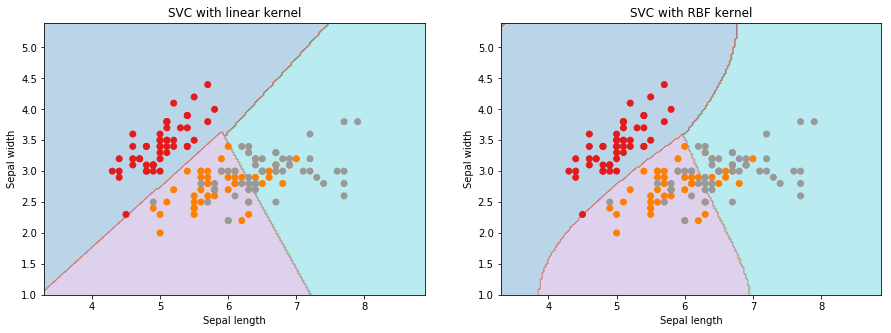

In [7]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt


iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

# Plot resulting Support Vector boundaries with original data
# Create fake input data for prediction that we will use for plotting
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C).fit(X, y)

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.show()


### Q 1
Develop an ML model for predicting the digits in the digits image dataset in
sklearn using SVM . Plot some sample input images together with its class
information. Also plot some predicted outputs together with its actual
images.
[hint: To plot the images using plt.imshow use the actual dimension of the
images in the dataset. Before fitting the data to the SVC model reshape the
X data from (n,8,8) to (n, 64) using X.reshape(n,-1) where n is the number of
images]

In [14]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
import  matplotlib.pyplot as plt

In [6]:
digi_data = load_digits()
digi_data.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [7]:
for i in digi_data:
    print i

images
data
target_names
DESCR
target


In [19]:
X=digi_data.images
y=digi_data.target
ilabels=list(zip(X,y))


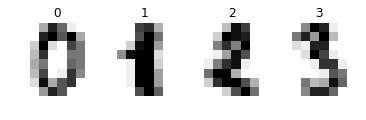

In [20]:
for index,(image,label) in enumerate(ilabels[:4]):
	plt.subplot(2,4,index+1)
	plt.axis('off')
	plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
	plt.title(label)
plt.show()

In [21]:
print X.shape
n=len(X)
X=X.reshape(n,-1)
print X.shape

(1797, 8, 8)
(1797, 64)


In [22]:
X_train=X[:n//2]
y_train=y[:n//2]
X_test=X[n//2:]
y_test=y[n//2:]

model=SVC(gamma=0.001)
model.fit(X_train,y_train)
p=model.predict(X_test)

In [23]:
print y_train.shape
print p.shape

(898,)
(899,)


In [24]:
crep = classification_report(y_test,p)
print confusion_matrix(y_test,p)
print crep

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899



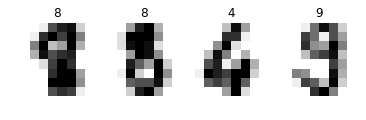

In [26]:
ilabels=list(zip(digi_data.images[n//2:],p))
for index,(image,label) in enumerate(ilabels[:4]):
        plt.subplot(2,4,index+1)
        plt.axis('off')
        plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
        plt.title(label)
plt.show()
